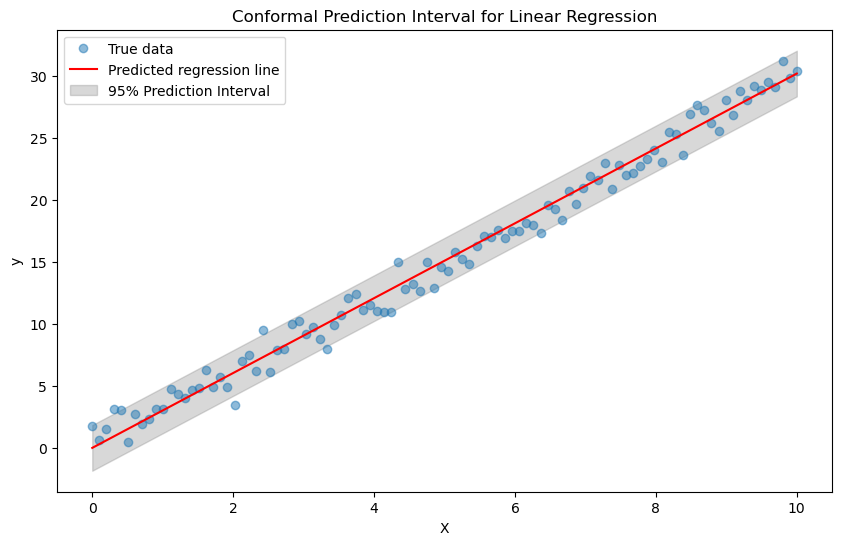

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.flatten() + np.random.normal(0, 1, 100)  # Linear relation with noise

# Split data into training and calibration sets
X_train, X_calib, y_train, y_calib = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on calibration set and compute residuals
y_calib_pred = model.predict(X_calib)
residuals = np.abs(y_calib - y_calib_pred)

# Set the desired confidence level (e.g., 95%)
confidence_level = 0.95
quantile = np.quantile(residuals, confidence_level)  # quantile-based threshold

# Predict on new data
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_test_pred = model.predict(X_test)

# Create prediction intervals
lower_bound = y_test_pred - quantile
upper_bound = y_test_pred + quantile

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, "o", label="True data", alpha=0.5)
plt.plot(X_test, y_test_pred, label="Predicted regression line", color="red")
plt.fill_between(
    X_test.flatten(),
    lower_bound,
    upper_bound,
    color="gray",
    alpha=0.3,
    label=f"{int(confidence_level * 100)}% Prediction Interval",
)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Conformal Prediction Interval for Linear Regression")
plt.show()
